In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

#Se realiza la lectura de cada uno de los archivos y se generan dos dataframes.
data_2017 = pd.read_excel("archivo2017.xlsx", sheet_name="Reporte-Sedes_Educativas-SIPTA-")
data_2018 = pd.read_excel("archivo2018.xlsx", sheet_name="Reporte-Sedes_Educativas-SIPTA-")


In [2]:
#Se procede a unir información entre los dos dataframes ycrear una sola base de datos.
data = pd.concat([data_2017, data_2018])

print(data.head(3))

   Codigo_DANE_EE                       Nombre_EE  numero_tutores  \
0    105001000001      INST EDUC JOSE MARIA VELAZ             1.0   
1  105001019925_1  INST EDUC ALCALDIA DE MEDELLIN             2.0   
2  105001019925_2  INST EDUC ALCALDIA DE MEDELLIN             2.0   

  Codigo_DANE_Sede_Educativa Codigo_DANE_EE.1 Codigo_DANE_Sede_Educativa.1  \
0               105001000001     105001000001                 105001000001   
1             105001000027_1     105001019925                 105001000027   
2             105001000027_2     105001019925                 105001000027   

                      LLAVE                    Nombre_Sede_Educativa  \
0  105001000001105001000001  INST EDUC FE Y ALEGRIA JOSE MARIA VELAZ   
1  105001019925105001000027            SEC ESC ANTONIO JOSE RESTREPO   
2  105001019925105001000027            SEC ESC ANTONIO JOSE RESTREPO   

  Sede_acompanada Requiere_alojamiento  ...  ID_Tutor  \
0              Si                   No  ...  39172706   
1      

In [3]:
#Conocer el tipo de datos que se registran en cada columna y verificar que se pueden hacer calculos con estos.
print(data.dtypes)

Codigo_DANE_EE                   object
Nombre_EE                        object
numero_tutores                  float64
Codigo_DANE_Sede_Educativa       object
Codigo_DANE_EE.1                 object
Codigo_DANE_Sede_Educativa.1     object
LLAVE                            object
Nombre_Sede_Educativa            object
Sede_acompanada                  object
Requiere_alojamiento             object
valor_transporte_trayecto         int64
Novedad                          object
ID_Tutor                         object
Nombre_Tutor                     object
Tutor_Activo                     object
ID_Formador                      object
Nombre_Formador                  object
Secretaria                        int64
Zona                            float64
Nombre_Secretaria                object
Sede_Activa                      object
fecha de ultima modificacion     object
dtype: object


In [4]:
#PREGUNTA
#1.¿Que departamento o ciudad posee más instituciones registradas en la base de datos?

#Conocer que departamentos o secretarías registran instituciones dentro de la base
departamentos = data["Nombre_Secretaria"].unique()
print(departamentos)

#Determinar el número de instituciones registradas por departamento.
num_inst_depar = data["Nombre_Secretaria"].value_counts()
print(num_inst_depar)

['MEDELLIN' 'ANTIOQUIA' 'APARTADO' 'TURBO' 'BARRANQUILLA' 'NO REGISTRA'
 'ATLANTICO' 'MALAMBO' 'SOLEDAD' 'Secretaria prueba' 'CARTAGENA' 'BOLIVAR'
 'MAGANGUE' 'TUNJA' 'BOYACA' 'DUITAMA' 'SOGAMOSO' 'MANIZALES' 'CALDAS'
 'FLORENCIA' 'CAQUETA' 'POPAYAN' 'CAUCA' 'VALLEDUPAR' 'CESAR' 'MONTERIA'
 'CORDOBA' 'LORICA' 'SAHAGUN' 'CUNDINAMARCA' 'FACATATIVA' 'GIRARDOT'
 'MOSQUERA' 'SOACHA' 'QUIBDO' 'CHOCO' 'NEIVA' 'HUILA' 'PITALITO'
 'RIOHACHA' 'LA GUAJIRA' 'MAICAO' 'URIBIA' 'SANTA MARTA' 'MAGDALENA'
 'CIENAGA' 'VILLAVICENCIO' 'META' 'PASTO' 'NARINO' 'IPIALES' 'TUMACO'
 'CUCUTA' 'NORTE DE SANTANDER' 'ARMENIA' 'QUINDIO' 'PEREIRA' 'RISARALDA'
 'SANTANDER' 'BARRANCABERMEJA' 'GIRON' 'PIEDECUESTA' 'SINCELEJO' 'SUCRE'
 'IBAGUE' 'TOLIMA' 'CALI' 'VALLE DEL CAUCA' 'BUENAVENTURA'
 'GUADALAJARA DE BUGA' 'CARTAGO' 'JAMUNDI' 'PALMIRA' 'TULUA' 'ARAUCA'
 'YOPAL' 'CASANARE' 'PUTUMAYO' 'SAN ANDRES Y PROVIDENCIA' 'AMAZONAS'
 'GUAINIA' 'GUAVIARE' 'VAUPES' 'VICHADA' 'YUMBO']
CUNDINAMARCA         2973
ANTIOQUIA       

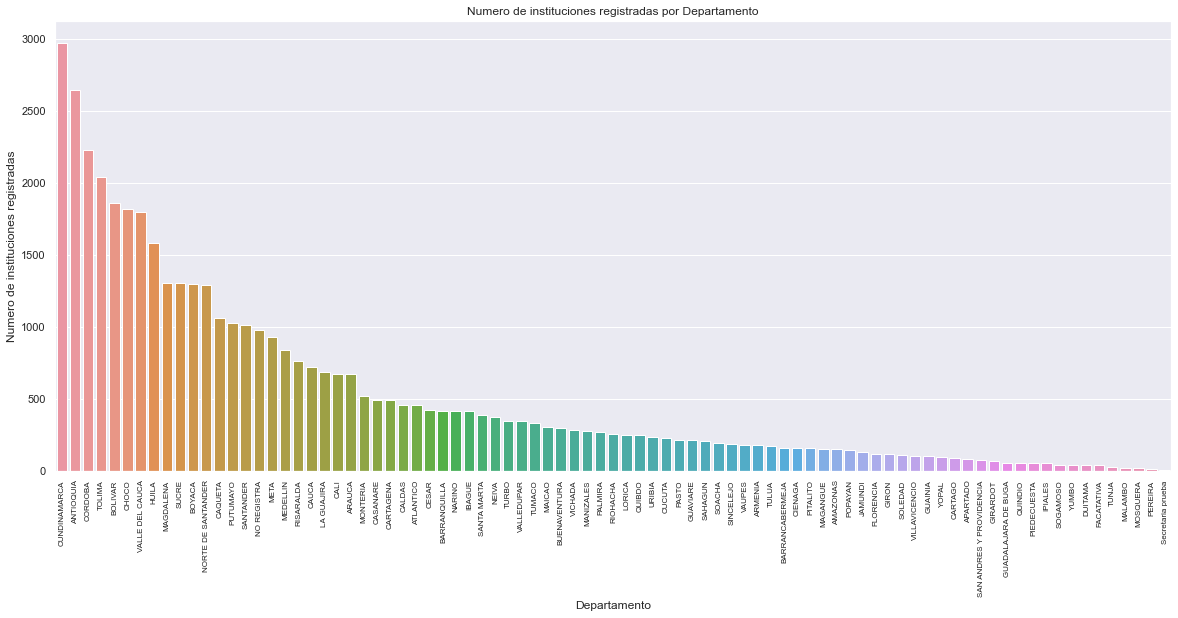

In [11]:
#Se realiza un diagrama de barras para visualizar la dimensión de la diferencia entre el número de instituciones registradas en cada departamento.
sns.countplot(x=data["Nombre_Secretaria"], order=data["Nombre_Secretaria"].value_counts().index)
plt.title("Numero de instituciones registradas por Departamento")
plt.xticks(rotation=90, fontsize=8)
plt.xlabel("Departamento")
plt.ylabel("Numero de instituciones registradas")
sns.set(rc={'figure.figsize':(20,8.27)})
plt.show()

In [6]:
#PREGUNTA
#2.¿Cuanto tutores se registran por departamento?

#Se determina de numero total de tutores por departamento.
tutores_pordepart = data.groupby("Nombre_Secretaria").numero_tutores.sum().reset_index()

#Se determina el valor máximo y valor mínimo de tutores registrados en los departamentos.
print(tutores_pordepart["numero_tutores"].max())
print(tutores_pordepart["numero_tutores"].min())

#Se obtiene el porcentaje de tutores por departamento.
tutores_pordepart["Porcentaje"]=(tutores_pordepart["numero_tutores"]/(tutores_pordepart["numero_tutores"].sum()))*100
#Se obtiene una tabla que indica de menor a mayor, el número y pocentaje de tutores de cada departamento.
print(tutores_pordepart.sort_values("numero_tutores"))

3313.0
6.0
    Nombre_Secretaria  numero_tutores  Porcentaje
71  Secretaria prueba             6.0    0.011442
53            PEREIRA            10.0    0.019070
41            MALAMBO            22.0    0.041954
75              TUNJA            28.0    0.053396
46           MOSQUERA            34.0    0.064838
..                ...             ...         ...
78    VALLE DEL CAUCA          2059.0    3.926542
72             TOLIMA          2138.0    4.077196
21            CORDOBA          2569.0    4.899119
1           ANTIOQUIA          3187.0    6.077654
23       CUNDINAMARCA          3313.0    6.317937

[85 rows x 3 columns]


    Nombre_Secretaria  numero_tutores  Porcentaje
71  Secretaria prueba             6.0    0.011442
53            PEREIRA            10.0    0.019070
41            MALAMBO            22.0    0.041954
75              TUNJA            28.0    0.053396
46           MOSQUERA            34.0    0.064838
25         FACATATIVA            37.0    0.070560
84              YUMBO            40.0    0.076281
68           SOGAMOSO            43.0    0.082002
   Nombre_Secretaria  numero_tutores  Porcentaje
70             SUCRE          1513.0    2.885312
43          MEDELLIN          1518.0    2.894847
32             HUILA          1683.0    3.209505
19             CHOCO          1852.0    3.531790
8            BOLIVAR          1874.0    3.573744
78   VALLE DEL CAUCA          2059.0    3.926542
72            TOLIMA          2138.0    4.077196
21           CORDOBA          2569.0    4.899119
1          ANTIOQUIA          3187.0    6.077654
23      CUNDINAMARCA          3313.0    6.317937


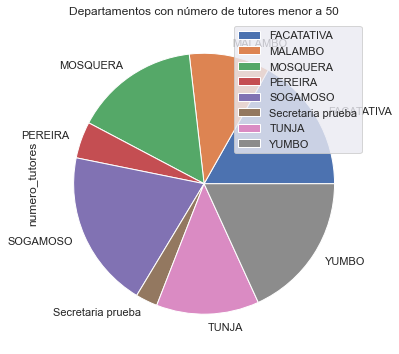

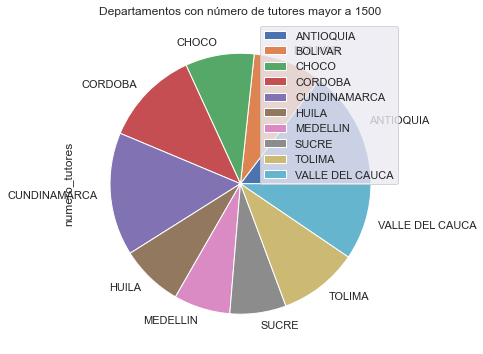

In [7]:
#Se realizan diagrama de torta para los departamentos con un total de tutores de 50 o menos.
dft_subset1 = tutores_pordepart[tutores_pordepart["numero_tutores"] <= 50]
labels1 = tutores_pordepart[tutores_pordepart["numero_tutores"] <= 50].Nombre_Secretaria
#Se realizan diagrama de torta para los departamentos  con número de tutores mayor a 1500.
dft_subset2 = tutores_pordepart[tutores_pordepart["numero_tutores"] > 1500]
labels2 = tutores_pordepart[tutores_pordepart["numero_tutores"] > 1500].Nombre_Secretaria

plot1 = dft_subset1.plot.pie(y='numero_tutores', figsize=(6, 6), labels=labels1, title="Departamentos con número de tutores menor a 50")
plot2 = dft_subset2.plot.pie(y='numero_tutores', figsize=(6, 6), labels= labels2, title="Departamentos con número de tutores mayor a 1500")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

#Se obtiene una tabla para cada diagrama, que indica el departamento, número de tutores y el porcentaje que representa del total de tutores registrados en la base de datos.
print(dft_subset1.sort_values("numero_tutores"))
print(dft_subset2.sort_values("numero_tutores"))

In [8]:
#PREGUNTA
#3.¿Cuales departamentos reportan el mayor valor de desplazamiento promedio?

#Se determina el promedio del valor del transporte por trayecto por cada departamento.
valorprom_pordepart = data.groupby("Nombre_Secretaria").valor_transporte_trayecto.mean().reset_index()

print(valorprom_pordepart.sort_values("valor_transporte_trayecto"))
ordenado_valorprom=valorprom_pordepart.sort_values("valor_transporte_trayecto")

           Nombre_Secretaria  valor_transporte_trayecto
27                  GIRARDOT                2613.432836
71         Secretaria prueba                2800.000000
49               NO REGISTRA                3018.342213
4                    ARMENIA                3142.329545
53                   PEREIRA                3260.000000
67                    SOACHA                4273.056995
22                    CUCUTA                4385.714286
55                  PITALITO                4852.903226
12                      CALI                5211.792593
59                   QUINDIO                5314.285714
15                   CARTAGO                5561.956522
43                  MEDELLIN                5752.486293
42                 MANIZALES                6345.532847
51                   PALMIRA                6566.420664
24                   DUITAMA                7084.210526
26                 FLORENCIA                7227.731092
56                   POPAYAN                7751

In [9]:
#Se organiza en un solo data grame los datos de los 6 primeros y 6 últimos departamentos segun la tabla de valores promedio por trayecto.
últimos6=ordenado_valorprom.head(6)
primeros6=ordenado_valorprom.tail(6)
Valores_prom_trayecto = pd.concat([últimos6, primeros6])
print(Valores_prom_trayecto)

    Nombre_Secretaria  valor_transporte_trayecto
27           GIRARDOT                2613.432836
71  Secretaria prueba                2800.000000
49        NO REGISTRA                3018.342213
4             ARMENIA                3142.329545
53            PEREIRA                3260.000000
67             SOACHA                4273.056995
57           PUTUMAYO               76009.424805
47             NARINO               96082.337349
19              CHOCO               96112.229752
80             VAUPES              159880.056180
81            VICHADA              162595.438596
30            GUAINIA              601795.145631


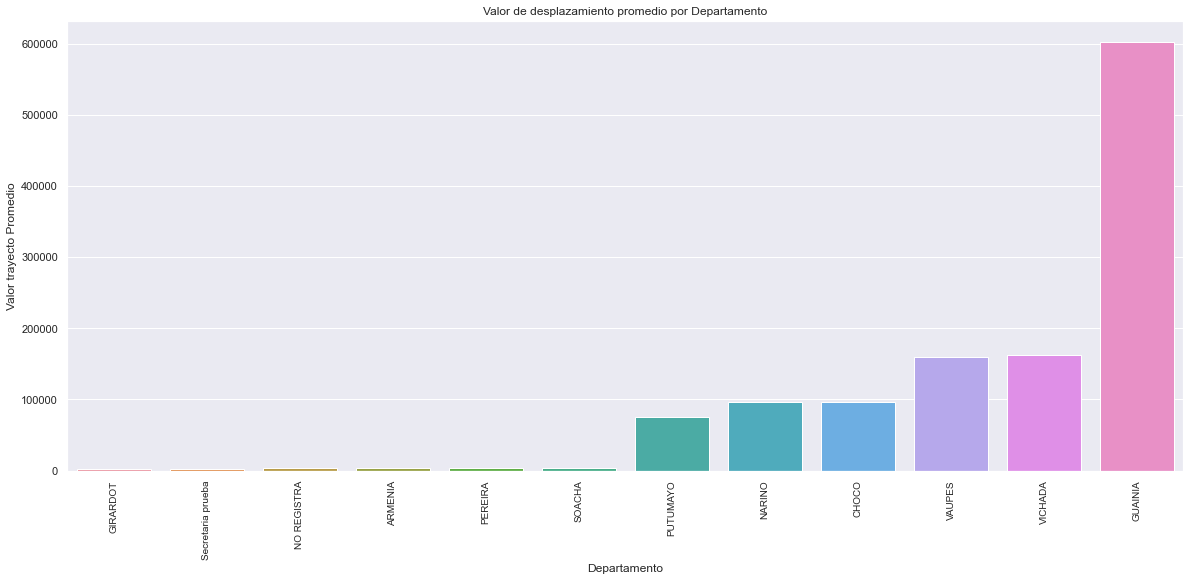

In [10]:
#Se relaiza gráfica de barras para evidenciar visualmente la diferencia entre depatamentos con mayor costo por trayecto y departamentos con menor costo por trayecto
sns.barplot(x=Valores_prom_trayecto["Nombre_Secretaria"], y=Valores_prom_trayecto["valor_transporte_trayecto"])
plt.title("Valor de desplazamiento promedio por Departamento")
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Departamento")
plt.ylabel("Valor trayecto Promedio")
plt.show()

**ANÁLISIS**

1. Del anterior análisis se puede evidenciar que departamentos como Cundinamarca y Antioquia poseen el mayor número de instituciones registradas. De igual forma estos dos departamentos poseen la mayor cantidad de tutores registrados.
2. Por otro lado es importante destacar que aquellos departamentos que poseen un costo promedio mayor a $80.000 poseen un registro bajo de instituciones, y muchas de estas regiones se encuentran en sectores rurales.
3. Por lo tanto, esto nos puede brindar una idea de que departamentos requieren de mayor atención al momento de ejecutar proyectos de construcción para instituciones educativas de acuerdo a la centralidad de cada población y el número de tutores disponibles.